## Edit Distance 

In [15]:
import pandas as pd
content = pd.read_csv('dataset/sqlResult_1558435.csv', encoding='gb18030')

In [33]:
content.columns

Index(['id', 'author', 'source', 'content', 'feature', 'title', 'url'], dtype='object')

In [29]:
minitest = content[:500]

In [30]:
import jieba

In [31]:
def cut(string): return list(jieba.cut(string))

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [41]:
from collections import Counter

In [47]:
Counter(cut(minitest.iloc[0].content)).values()

dict_values([1, 9, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
def term_frequency(word, index):
    content = minitest.iloc[0].content
    words = cut(content)
    words_conter = Counter(words)
    frequence = words_conter[word] / sum(words_conter.values())
    return frequence

In [49]:
term_frequency('小米', 0)

0.009615384615384616

In [55]:
each_document_word_count = [
    Counter(cut(str(document))) for document in minitest['content'].tolist()
]

In [59]:
import numpy as np

In [66]:
def inverse_ducment_frequency(word):
    return np.log(len(each_document_word_count)/sum(1 for counter in each_document_word_count if word in counter))

In [68]:
inverse_ducment_frequency('小米')

3.912023005428146

In [74]:
def tf_idf(word, i):
    return term_frequency(word, i) * inverse_ducment_frequency(word)

In [79]:
tf_idf('发布', 0)

0.035976974549394386

In [70]:
import operator as op
from functools import reduce

In [71]:
single_counter = reduce(op.add, each_document_word_count)

In [82]:
len(single_counter)

30614

### TODO add stop words

In [78]:
minitest.iloc[0].content

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [83]:
vector_1 = [tf_idf(w, 0) for w in single_counter]

#### TODO Use TFIDF in sci-kit learning

## Keywords

## Tfidf

tf = term frequency

$tf = \frac{Term_{num}}{Words_{num}}$

inverse document frequency

$idf = \log({\frac{D_{all}}{D_{w}}})$

### For search: 

$$ Importance = \sum_{i}^{n} TF_i \cdot IDF_i $$

### For Sentence or Documents

$$ Representation = [TF_{0} \cdot IDF_i{0}, TF_{1} \cdot IDF_{1}, ... , TF_{n} \cdot IDF_n{} ] $$

## WordCloud

In [90]:
## chinese will have problem 
## the such like problem is occured by chinese 
## solve it by yourself!
## source https://github.com/amueller/word_cloud

In [85]:
import wordcloud

In [128]:
wc = wordcloud.WordCloud(font_path='/Users/kouminquan/Downloads/simkai.ttf', max_font_size=100)

In [103]:
' '.join(cut(minitest.iloc[0].content))

'此外 ， 自 本周 （ 6 月 12 日 ） 起 ， 除 小米 手机 6 等 15 款 机型 外 ， 其余 机型 已 暂停 更新 发布 （ 含 开发 版 / 体验版 内测 ， 稳定版 暂不受 影响 ） ， 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 。 有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中 。 \r\n MIUI   8 去年 5 月 发布 ， 距今已有 一年 有余 ， 也 是 时候 更新换代 了 。 \r\n 当然 ， 关于 MIUI   9 的 确切 信息 ， 我们 还是 等待 官方消息 。 \r\n'

In [129]:
word_cloud = wc.generate_from_text(' '.join(cut(minitest.iloc[0].content)))

In [130]:
import matplotlib.pyplot as plt

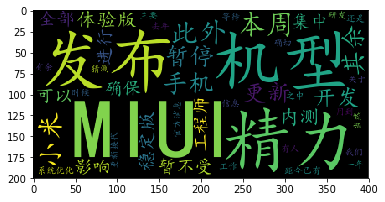

In [131]:
plt.imshow(word_cloud)

In [132]:
%matplotlib  inline

In [136]:
from importlib import reload

In [137]:
reload(wordcloud)

<module 'wordcloud' from '/Users/kouminquan/anaconda/envs/ai-lab/lib/python3.6/site-packages/wordcloud/__init__.py'>

In [143]:
dict_w = dict(each_document_word_count[0])

In [145]:
del dict_w['\r\n']

In [146]:
word_cloud_w = wc.generate_from_frequencies(dict_w)

In [149]:
tf_idf_for_text_1 = {w: tf_idf(w, 0) for w in dict_w}

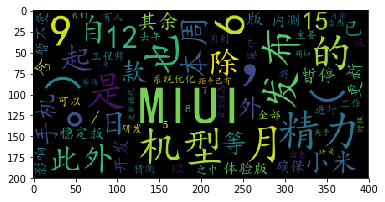

In [150]:
plt.imshow(word_cloud_w)

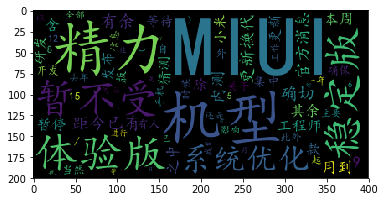

In [152]:
plt.imshow(wc.generate_from_frequencies(tf_idf_for_text_1))